<a href="https://colab.research.google.com/github/abhirampitla-13/2311cs020528/blob/main/ML_9%2610_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Step 1: Data standardization
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 2: Covariance matrix calculation
def compute_covariance_matrix(X):
    return np.cov(X.T)

# Step 3: Eigenvalue and eigenvector calculation
def find_eigenvectors_and_eigenvalues(X):
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 4: Principal component calculation
def project_data(X, eigenvectors, k):
    sorted_index = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    sorted_eigenvectors = eigenvectors[:, sorted_index[:k]]  # Select top k eigenvectors
    return np.dot(X, sorted_eigenvectors)

# Step 5: Dimensionality reduction
def get_variance_explained(eigenvalues, k):
    return sum(eigenvalues[:k]) / sum(eigenvalues)

# Example usage
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
X_std = standardize(X)
eigenvalues, eigenvectors = find_eigenvectors_and_eigenvalues(X_std)
projected_data = project_data(X_std, eigenvectors, 2)
variance_explained = get_variance_explained(eigenvalues, 2)

print("Standardized data:")
print(X_std)
print("Covariance matrix:")
print(compute_covariance_matrix(X_std))
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
print("Projected data:")
print(projected_data)
print("Variance explained:")
print(variance_explained)

Standardized data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Covariance matrix:
[[1.5 1.5 1.5]
 [1.5 1.5 1.5]
 [1.5 1.5 1.5]]
Eigenvalues:
[0.  4.5 0. ]
Eigenvectors:
[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]
Projected data:
[[-2.12132034e+00  1.68306266e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.12132034e+00 -1.68306266e-16]]
Variance explained:
1.0


In [ ]:
import numpy as np # Predefined
# dataset
dataset = np.array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9],
[10, 11, 12]
])
# Calculate the covariance matrix
covariance_matrix = np.cov(dataset, rowvar=False)
# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[15. 15. 15.]
 [15. 15. 15.]
 [15. 15. 15.]]


**10**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation

# File name for the dataset
file_name = r'/content/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset
pima = pd.read_csv(file_name, header=None, names=col_names)
print(pima.head())  # Display the first few rows of the dataset

# Split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Features
y = pima['label']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Display the first few rows of the training data
print(X_train.head())
print(y_train.head())

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Display the first few rows of the test data and predictions
print(X_test.head())
print(y_pred[:5])  # Display first 5 predictions
print(y_test.head())

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
     pregnant  insulin   bmi  age  glucose  bp  pedigree
88         15      110  37.1   43      136  70     0.153
467         0      100  36.8   25       97  64     0.600
550         1        0  27.4   21      116  70     0.204
147         2      119  30.5   34      106  64     1.400
481         0        0  35.2   29      123  88     0.197
88     1
467    0
550    0
147    0
481    0
Name: label, dtype: int64
     pregnant  insulin   bmi  age  glucose  bp  pedigree
285         7      135  26.0   51      136  74     0.647
101         1        0  26.1   22      151  60     0.179
581     

**10.1**

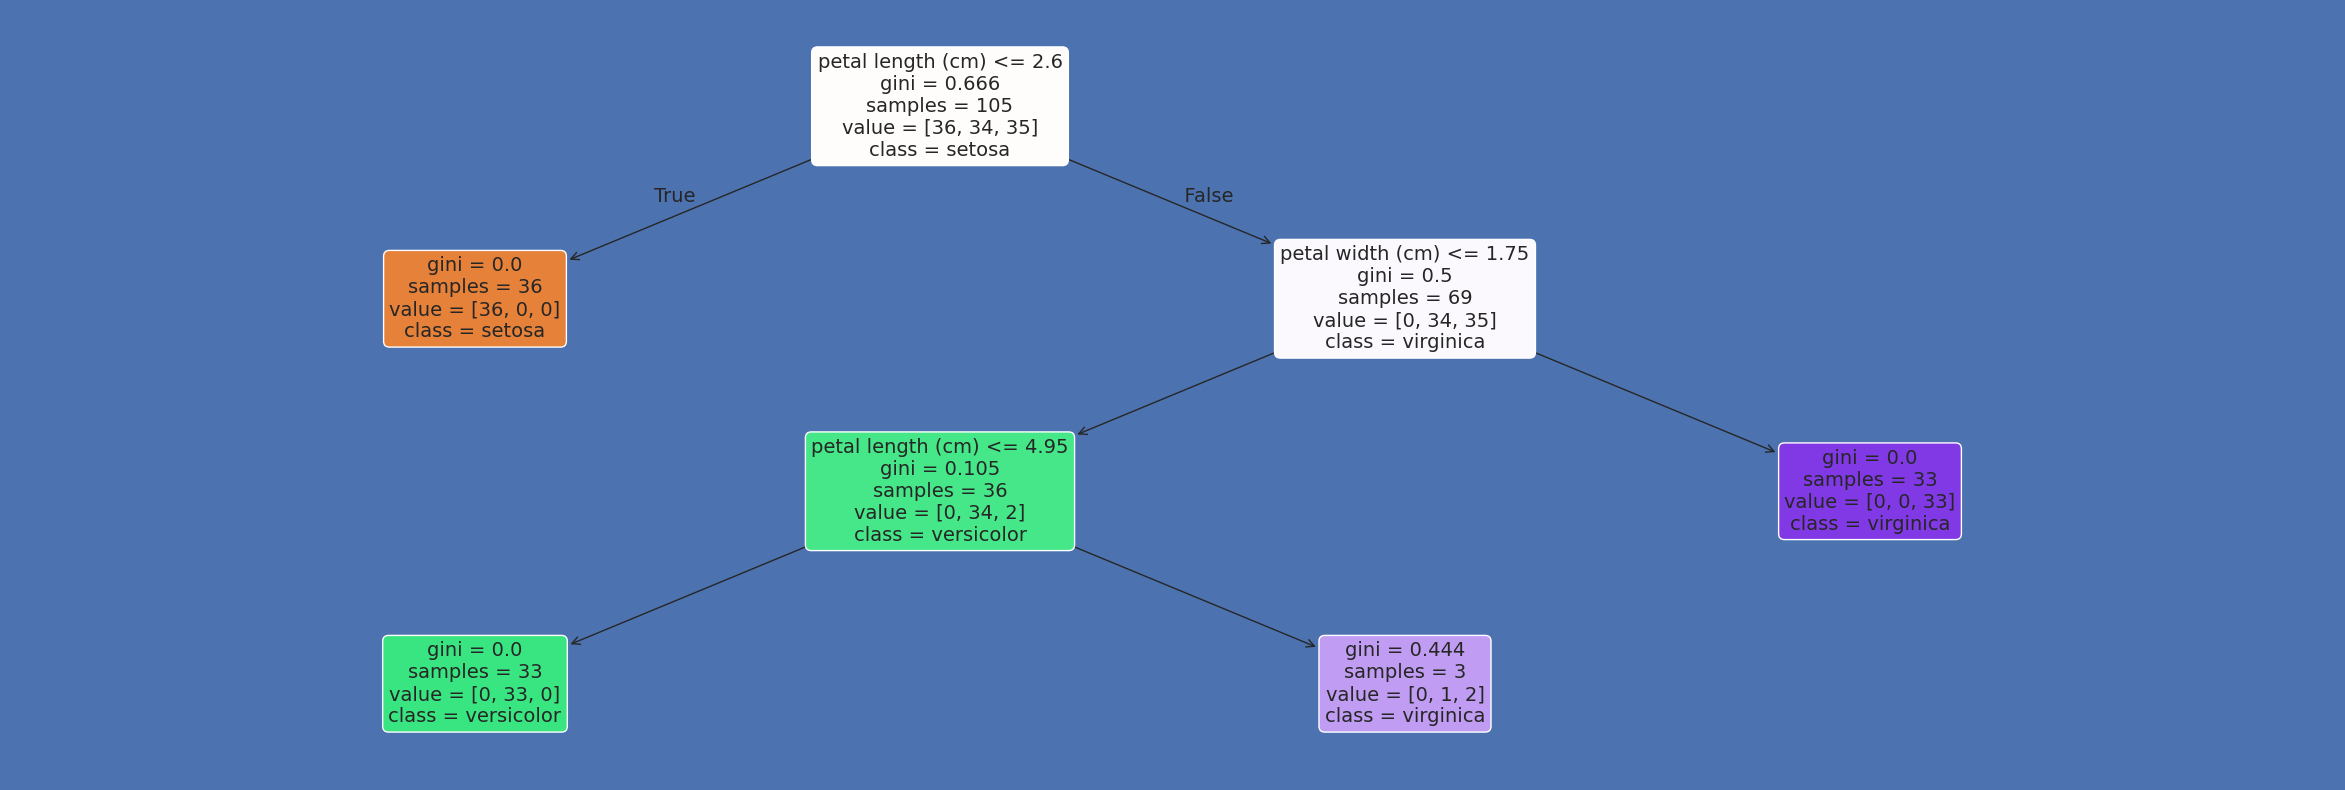

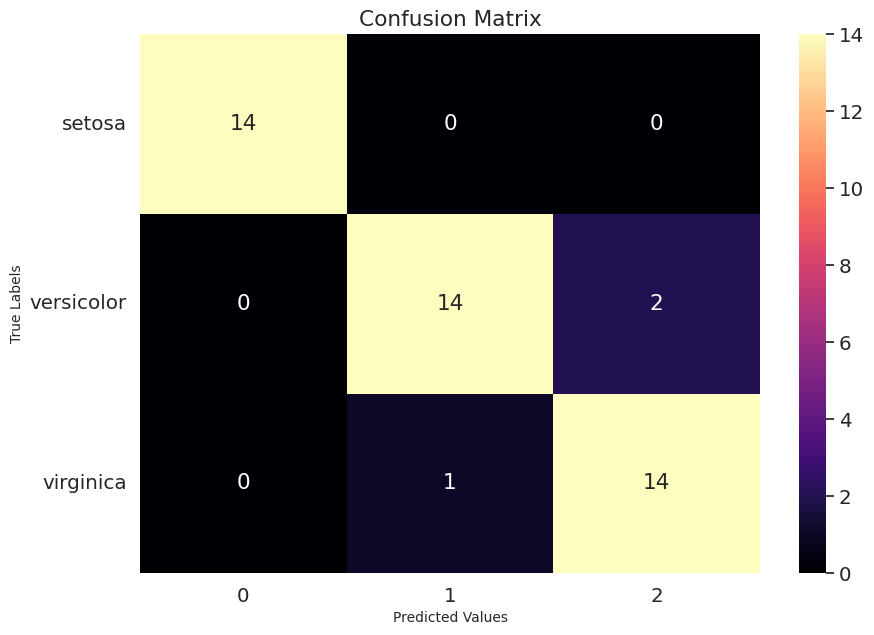

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset
iris = load_iris()

# Converting the data to a pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creating a separate column for the target variable of the iris dataset
data['Species'] = iris.target

# Replacing the categories of the target variable with the actual names of the species
target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

# Separating the independent and dependent variables of the dataset
X = data.drop(columns="Species")
y = data["Species"]

# Feature names and target labels
names_features = X.columns
target_labels = y.unique()

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

# Creating an instance of the Decision Tree classifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=93)

# Fitting the training dataset to the model
dtc.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(30, 10), facecolor='b')
tree.plot_tree(dtc, feature_names=names_features, class_names=target_labels, rounded=True, filled=True, fontsize=14)
plt.show()

# Making predictions on the test set
y_pred = dtc.predict(X_test)

# Finding the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
axis = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix, annot=True, fmt="g", ax=axis, cmap="magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize=10)
axis.set_ylabel("True Values", fontsize=10)
axis.set_ylabel("True Labels", fontsize=10)
axis.set_yticklabels(list(target_labels), rotation=0)
plt.show()

**10.2**

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load or create your dataset
# For simplicity, let's create a sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 1, 3, 6, 8, 5, 7, 10, 9],
    'Target': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Split the dataset into features (X) and target variable (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Check if the accuracy meets the desired threshold (97%)
desired_accuracy = 0.97
if accuracy >= desired_accuracy:
    print(f'Model accuracy meets the desired threshold of {desired_accuracy:.2%}')
else:
    print(f'Model accuracy does not meet the desired threshold of {desired_accuracy:.2%}')

Accuracy: 1.00
Model accuracy meets the desired threshold of 97.00%
